In [1]:
import seaborn as sns
import pandas as pd
# !pip install vaderSentiment
# !pip install plotnine
from plotnine import *
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
# !pip uninstall statsmodels

# !pip install numpy scipy patsy pandas

# !pip install statsmodels

In [2]:
conservative  = pd.read_csv("data/conservative.csv")
conservative = conservative[conservative.lang == "en"]
conservative.drop_duplicates('text', inplace=True)

liberal  = pd.read_csv("data/liberal.csv")
liberal = liberal[liberal.lang == "en"]
liberal.drop_duplicates('text', inplace=True)

contweets = conservative[["topic","text","created_at","retweet_count"]]
contweets.created_at = pd.to_datetime(contweets.created_at)

libtweets = liberal[["topic","text","created_at","retweet_count"]]
libtweets.created_at = pd.to_datetime(libtweets.created_at)

/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
def sentscores(sentence):
    score = analyser.polarity_scores(sentence)
    return score["compound"]

In [4]:
contweets["score"] = contweets.text.apply(sentscores)
libtweets["score"] = libtweets.text.apply(sentscores)

/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
contweets.sample(10)

,topic,text,created_at,retweet_count,score
872,trump,RT @jankybrain: Mark my words: \n\nThe RNC wil...,2020-08-22 14:52:07+00:00,444,-0.0516
4620,portland,@MrPRicoSuave @QTAnon1 Totally agree. If a sto...,2020-08-22 14:48:43+00:00,0,0.1513
3618,antifa,RT @MrAndyNgo: I went on @FoxNews to discuss h...,2020-08-22 14:47:41+00:00,2348,-0.7351
1033,biden,RT @ajzeigler: I know a lot of right-leaning f...,2020-08-22 14:52:30+00:00,11,-0.6880
286,trump,RT @TheRISEofROD: Trump love miners\n\nBiden l...,2020-08-22 14:52:19+00:00,1822,0.8555
628,trump,"RT @CaslerNoel: ‘Revenge is sweet, sayeth the ...",2020-08-22 14:52:12+00:00,400,0.4588
786,trump,RT @ChuckCallesto: BREAKING REPORT: ANTIFA Mil...,2020-08-22 14:52:09+00:00,3404,0.5766
4112,portland,"RT @kittenmule888: 👇🏻💥💥”I wasn’t the enemy, I’...",2020-08-22 14:51:45+00:00,59,-0.7184
1864,biden,@AndyHerren Yeah. I know some people who are d...,2020-08-22 14:51:49+00:00,0,0.4118
1151,biden,Joe Biden may have chosen a black woman as his...,2020-08-22 14:52:25+00:00,0,-0.3950


In [6]:
libtweets.sample(10)

,topic,text,created_at,retweet_count,score
1314,democrats,RT @TimRunsHisMouth: Democrats LOVED Unions un...,2020-08-22 14:52:33+00:00,523,0.6841
1745,democrats,RT @davereaboi: Democrats won’t condemn Antifa...,2020-08-22 14:51:57+00:00,262,-0.8625
1920,democrats,@SenSchumer How would you do better. Cuomo’s ...,2020-08-22 14:51:40+00:00,0,0.4926
761,coronavirus,RT @wfaa: The U.S. can get the coronavirus und...,2020-08-22 14:51:39+00:00,40,0.0000
1423,democrats,The lame stream media is filled with lie after...,2020-08-22 14:52:23+00:00,0,-0.4215
2347,ukraine,@Azula163 @ChefMandolorian @PSchtup @thehill N...,2020-08-22 14:38:37+00:00,0,0.0000
87,coronavirus,RT @ABCWorldNews: South Korea's presidential o...,2020-08-22 14:52:48+00:00,2,0.0000
4633,protest,RT @gerrywebster: Our dear gardai have allowed...,2020-08-22 14:52:03+00:00,9,-0.1280
166,coronavirus,Masks can help control the spread of this coro...,2020-08-22 14:52:39+00:00,0,0.4019
3058,police,RT @livesmattershow: LAST NIGHT: After rioters...,2020-08-22 14:53:09+00:00,125,0.0000


In [7]:
libtweets.groupby("topic").mean()

,retweet_count,score
topic,,
coronavirus,1094.663743,-0.033927
democrats,1775.526961,-0.035853
police,1015.594320,-0.182297
protest,890.102326,-0.142390
ukraine,227.115942,-0.033992


In [8]:
contweets.groupby("topic").mean()

,retweet_count,score
topic,,
BLM,644.437853,-0.060884
antifa,450.162162,-0.152269
biden,1157.496957,0.025244
portland,574.574899,-0.147702
trump,920.454407,-0.036268


In [9]:
con_sent = contweets.groupby("topic").mean()
con_sent['type'] = "Conservative"
lib_sent = libtweets.groupby("topic").mean()
lib_sent['type'] = "Liberal"


full_sens = pd.concat([con_sent, lib_sent])
full_sens['topic'] = full_sens.index

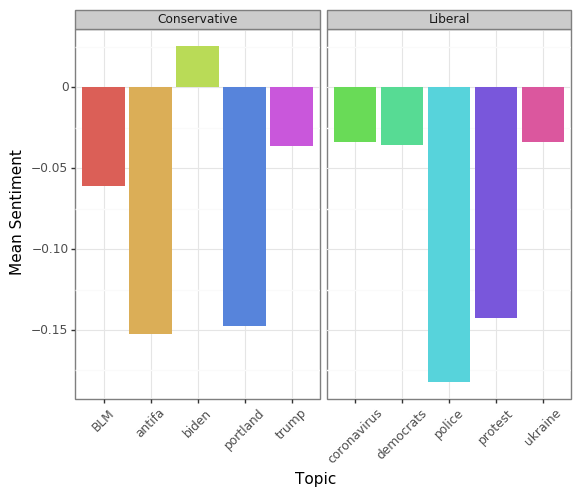

<ggplot: (8766932430685)>

In [26]:

# g = sns.FacetGrid(full_sens, col="type", height=6, ylim = (-.25, .25))
# g = g.map(plt.bar, "topic", "score")
# g.set_axis_labels("Topic", "Mean Sentiment")


(ggplot(full_sens, aes(x = 'topic', y = 'score', fill = 'topic')) + 
    geom_bar(stat = 'identity') + 
    facet_wrap(['type'], scales = "free_x") + 
    theme_bw() +
    theme(axis_text_x = element_text(angle=45)) + 
    guides(fill = False) + 
    labs(x = "Topic", y = "Mean Sentiment"))

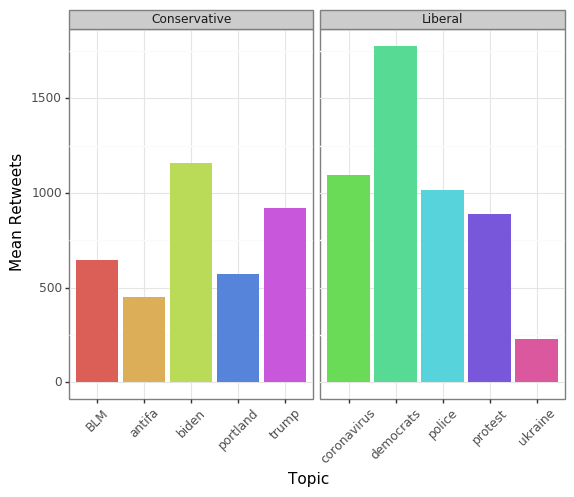

<ggplot: (8766929038941)>

In [31]:
(ggplot(full_sens, aes(x = 'topic', y = 'retweet_count', fill = 'topic')) + 
    geom_bar(stat = 'identity') + 
    facet_wrap(['type'], scales = "free_x") + 
    theme_bw() +
    theme(axis_text_x = element_text(angle=45)) + 
    guides(fill = False) + 
    labs(x = "Topic", y = "Mean Retweets"))